# How should you invest in the markets?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sp = pd.read_csv('SP500.csv', index_col='Date')
gld = pd.read_csv('GLD.csv', index_col='Date')
ief = pd.read_csv('IEF.csv', index_col='Date')

In [3]:
sp.head()

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
01-Aug-21,"4,406.86","4,440.82","4,373.00","4,432.35","4,432.35","17,961,970,000"
01-Jul-21,"4,300.73","4,429.97","4,233.13","4,395.26","4,395.26","66,496,430,000"
01-Jun-21,"4,216.52","4,302.43","4,164.40","4,297.50","4,297.50","85,705,180,000"
01-May-21,"4,191.98","4,238.04","4,056.88","4,204.11","4,204.11","75,155,370,000"
01-Apr-21,"3,992.78","4,218.78","3,992.78","4,181.17","4,181.17","82,869,290,000"


In [4]:
gld.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-12-01,45.279999,46.000000,43.200001,43.799999,43.799999,60797000
2005-01-01,42.980000,43.169998,41.700001,42.220001,42.220001,35535200
2005-02-01,42.090000,43.740002,41.020000,43.529999,43.529999,40148400
2005-03-01,43.299999,44.669998,42.349998,42.820000,42.820000,41040400
2005-04-01,42.599998,43.700001,42.160000,43.349998,43.349998,38430000


In [5]:
ief.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-02-01,85.220001,86.739998,85.000000,86.680000,54.143299,3032300
2004-03-01,86.650002,88.550003,85.699997,87.550003,54.850189,6808200
2004-04-01,87.220001,87.250000,83.110001,83.500000,52.464756,5043200
2004-05-01,83.160004,83.650002,81.309998,82.790001,52.171230,4531600
2004-06-01,82.260002,83.110001,81.250000,83.050003,52.503536,3883800


In [6]:
sp.index = pd.to_datetime(sp.index)
gld.index = pd.to_datetime(gld.index)
ief.index = pd.to_datetime(ief.index)

In [7]:
sp = sp.loc['2005-12-01':, :].sort_index()
gld = gld.loc['2006':, :].sort_index()
ief = ief.loc['2006':,:].sort_index()

/Users/davidlam/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1109: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return self._getitem_tuple_same_dim(tup)


In [8]:
ief = ief[['Adj Close']]
gld = gld[['Adj Close']]
sp = sp[['Adj Close**']]
sp.columns = ['Adj Close']

In [9]:
sp.sort_index()
sp_num = sp['Adj Close'].str.replace(",", '')
sp_num = pd.DataFrame(sp_num)
sp_num = pd.to_numeric(sp_num['Adj Close'])
sp_num = pd.DataFrame(sp_num)

In [10]:
# Bring the time series to base value for SP500

sp_first = sp_num.iloc[0,0]
sp_df = sp_num.div(sp_first).mul(1000)

# Bring the time series to base value for GLD

gld_first = gld.iloc[0,0]
gld_df = gld.div(gld_first).mul(1000)


# Bring the time series to base value for GLD

ief_first = gld.iloc[0,0]
ief_df = ief.div(ief_first).mul(1000)

# Conservative or Risk Seeking Strategy?

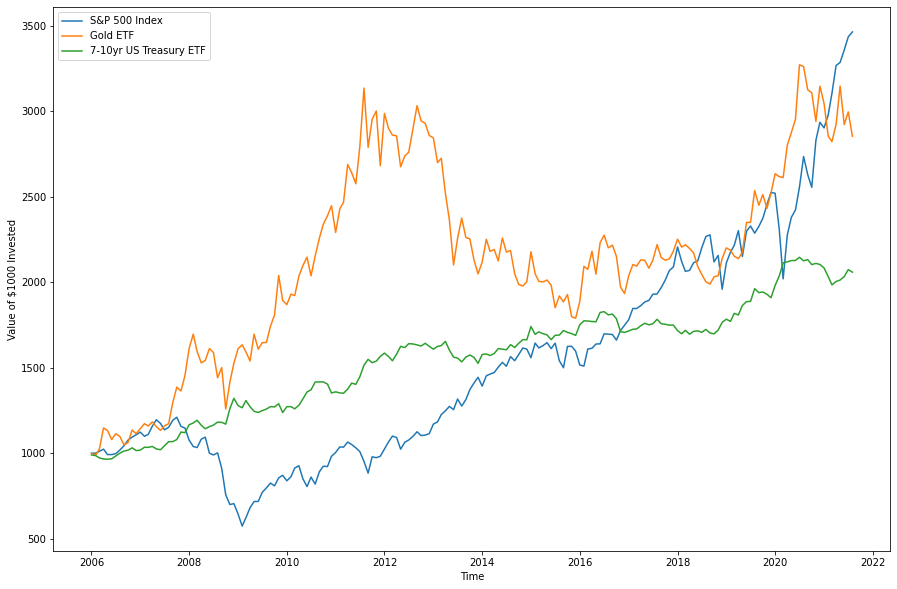

In [11]:
plt.figure(figsize=(15,10))

plt.plot(sp_df, label='S&P 500 Index')
plt.plot(gld_df, label='Gold ETF')
plt.plot(ief_df, label='7-10yr US Treasury ETF')

plt.ylabel('Value of $1000 Invested')
plt.xlabel('Time')
plt.legend(loc = 'upper left')

In [12]:
fed = pd.read_csv('Fed Assets.csv')

In [13]:
fed['Date'] = pd.to_datetime(fed['Date'], format='%d-%b-%y')
fed = fed.set_index(fed['Date']).drop('Date', axis=1)

In [14]:
fed

,Total Assets
Date,
2007-08-01,870261
2007-08-08,865453
2007-08-15,864931
2007-08-22,862775
2007-08-29,872873
...,...
2021-07-07,8097773
2021-07-14,8201651
2021-07-21,8240530


# Can you diversify with a standard Fixed Income/Equity portfolio?

Text(0, 0.5, '7-10yr US Treasury ETF')

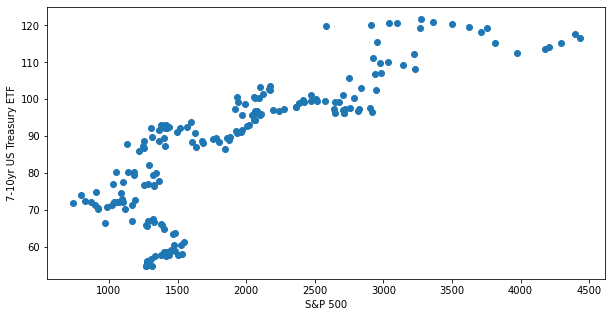

In [15]:
plt.figure(figsize=(10,5))

plt.scatter(sp_num, ief)
plt.xlabel('S&P 500')
plt.ylabel('7-10yr US Treasury ETF')

In [16]:
# create a df with SP500, IEF and fed assets combined

combined_df = pd.concat([sp_num, ief_df], axis=1)
combined_df.columns = ['SP500', 'IEF']
combined_df

,SP500,IEF
Date,,
2006-01-01,1280.08,990.155926
2006-02-01,1280.66,985.996420
2006-03-01,1294.87,972.559736
2006-04-01,1310.61,966.490195
2006-05-01,1270.09,965.021041
...,...,...
2021-04-01,4181.17,2003.836349
2021-05-01,4204.11,2012.291129
2021-06-01,4297.50,2032.783509


In [17]:
fed_stock = pd.concat([combined_df, fed], axis=1)

In [18]:
fed_stock = fed_stock.loc[~fed_stock['SP500'].isnull(),:]
fed_stock_complete = fed_stock[~fed_stock['Total Assets'].isnull()]

In [19]:
fed_stock_complete

,SP500,IEF,Total Assets
Date,,,
2007-08-01,1473.99,1067.242009,870261.0
2008-10-01,968.75,1170.212801,1503989.0
2009-04-01,872.81,1271.826239,2078936.0
2009-07-01,987.48,1248.866327,2005627.0
2010-09-01,1141.20,1416.736024,2301996.0
2010-12-01,1257.64,1352.212869,2346920.0
2011-06-01,1320.64,1402.704384,2788723.0
2012-02-01,1365.68,1565.125722,2924947.0
2012-08-01,1406.58,1638.695421,2851118.0


# Savings rate has declined since 1980

| Type          | 1980        | 1985      | 1990   | 2000 | 2001 | 2002|
| ------------- | ----------- |-----------| -------|------|------|-----|
| Fed Funds Rate| 13.35%      |8.10%      |  8.10% |6.24% | 3.88%|1.67%|



# In today's environment, we have no choice but to take more risk

Text(0, 0.5, 'Feder Reserve Balance Sheet')

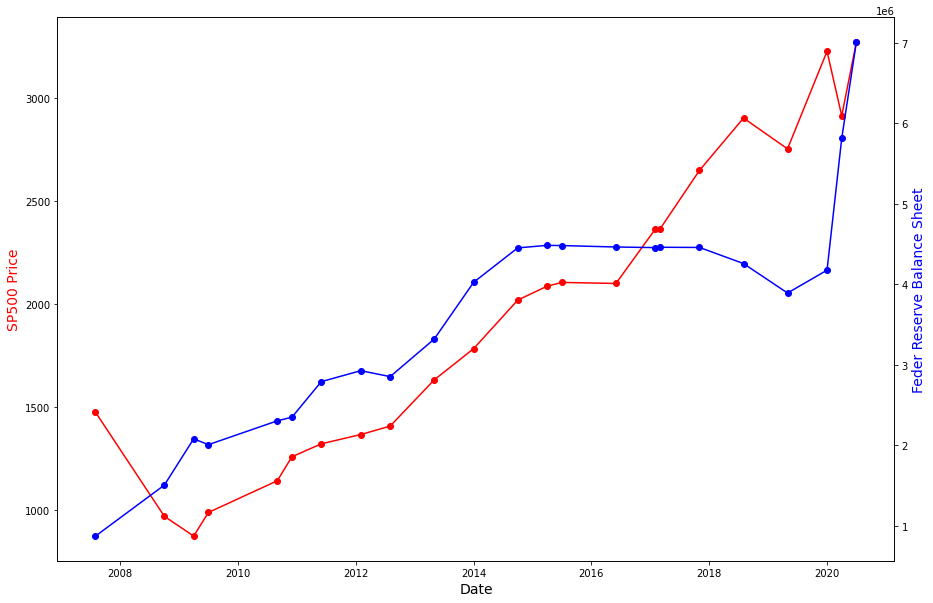

In [20]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(15,10))

# make a plot
ax.plot(fed_stock_complete.index, fed_stock_complete['SP500'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("SP500 Price",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(fed_stock_complete.index, fed_stock_complete['Total Assets'],color="blue",marker="o")
ax2.set_ylabel("Feder Reserve Balance Sheet",color="blue",fontsize=14)